In [155]:
import pickle


exp_2184 = {}
exp_99413 = {}

with open(f"./results/exp_zipf_2184.txt", 'rb') as f:
        results = pickle.load(f)
models = list(results.keys())

In [156]:
for model in models:
    exp_2184[model] = {"x": None, "y": None}
    exp_2184[model]['x'] = results[model][0][0]
    exp_2184[model]['y'] = results[model][0][1]

In [157]:
with open(f"./results/exp_zipf_99413.txt", 'rb') as f:
        results = pickle.load(f)
for model in models:
    exp_99413[model] = {"x": None, "y": None}
    exp_99413[model]['x'] = results[model][0][0]
    exp_99413[model]['y'] = results[model][0][1]   

In [158]:
models.append("TrieHH")
triehh_99413 = [[0.5, 1.1, 1.7000000000000002, 2.3000000000000003, 2.9000000000000004, 3.5000000000000004, 4.1000000000000005, 4.7, 5.3, 5.8999999999999995, 6.499999999999999, 7.099999999999999, 7.699999999999998, 8.299999999999999, 8.899999999999999], [0.23288888888888878, 0.461090909090909, 0.5595151515151519, 0.6808391608391612, 0.7671794871794871, 0.8336703296703293, 0.8777289377289371, 0.9111666666666659, 0.9506190476190471, 0.9584999999999999, 0.9536666666666668, 0.9475, 0.9775, 0.945, 0.955]]
exp_99413["TrieHH"] = {}
exp_99413["TrieHH"]['x'] = triehh_99413[0]
exp_99413["TrieHH"]['y'] = triehh_99413[1]

triehh_2184 = [[0.5, 1.1, 1.7000000000000002, 2.3000000000000003, 2.9000000000000004, 3.5000000000000004, 4.1000000000000005, 4.7, 5.3, 5.8999999999999995, 6.499999999999999, 7.099999999999999, 7.699999999999998, 8.299999999999999, 8.899999999999999], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0044444444444444444, 0.008888888888888889, 0.06222222222222224, 0.0666666666666667, 0.14222222222222228, 0.18222222222222217, 0.20888888888888876, 0.22222222222222204]]
exp_2184["TrieHH"] = {}
exp_2184["TrieHH"]['x'] = triehh_2184[0]
exp_2184["TrieHH"]['y'] = triehh_2184[1]

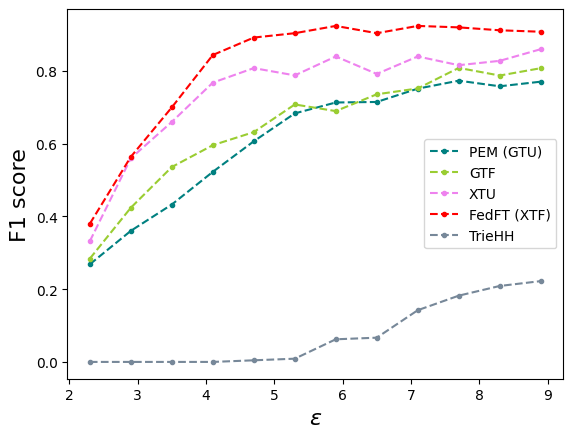

In [162]:
from matplotlib import pyplot as plt


color = ['teal', 'yellowgreen', "violet", 'red', "lightslategrey"]

for i in range(len(models)):
        if models[i] == "PEM":
            model_name = "PEM (GTU)"
        elif models[i] == "XTF":
            model_name = "FedFT (XTF)"
        else:
            model_name = models[i]
        fig = plt.figure(1)
        plt.plot(exp_2184[models[i]]['x'][3:], exp_2184[models[i]]['y'][3:], '.--', color=color[i], label=model_name)
        # fig = plt.figure(2)
        # plt.plot(exp_99413[models[i]]['x'][3:], exp_99413[models[i]]['y'][3:], '*-.', color=color[i], label=model_name)

plt.legend(loc="center right")
plt.xlabel(r"$\varepsilon$", fontdict={'fontsize': 16})
plt.ylabel("F1 score", fontdict={'fontsize': 16})
plt.savefig("./results/zipfs.png")

In [137]:
a = []
for value in exp_2184.values():
    a.append(value['y'])

In [152]:
varepsilon = list(exp_2184.values())[0]['x'][3]
print(varepsilon)

2.3000000000000003


In [147]:

f1 = {}
for i, model in enumerate(models):
    f1[model] = a[i][3]

In [153]:
# GTU (PEM) vs XTU
print(f"XTU & ", f'{(f1["XTU"]- f1["PEM"])*100/f1["PEM"] :.2f}', "%")
print(f"GTF & ", f'{(f1["GTF"]- f1["PEM"])*100/f1["PEM"] :.2f}', "%")
print(f"XTF & ", f'{(f1["XTF"]- f1["PEM"])*100/f1["PEM"] :.2f}', "%")


XTU &  23.68 %
GTF &  5.79 %
XTF &  41.56 %


In [160]:
# import numpy as np
# from PIL import Image
# import os
# concatenated = Image.fromarray(
# np.concatenate(
#     [np.array(Image.open(x)) for x in ['results/zipfs_2.png', 'results/zipfs_1.png']],
#     axis=1
# )
# )
# concatenated.save(os.path.join('results', f"zipfs_0.png"))